30397101.670747384
9888450.400940727
77225451.54598089
3884434.482302245
86242643.3784287
2159460.2406374835
86551972.24008743
1406129.1139875234
85563599.62639612
1003595.061509515
84347619.93930027
760333.8001361194
82959459.06409286
600713.8886114843
81500224.60359013
489579.55226120196
80200866.60985456
408663.75482326426
79074140.55316727
347652.3115172071
77878141.17543906
300338.3345212801
76694144.23578906
262790.97790546564
75489516.0119351
232415.06970356905
74191824.368102
207436.7790161718
72951683.78794426
186607.5266989899
71709529.14033553
169026.05252572373
70616641.48901524
154027.45170176646
69602272.21713555
141111.73788054226
68485180.18290709
129896.5529635511
67322951.92028083
120085.08442384077
66084317.67710853
111443.82057751367
64985226.10786709
103786.82396202361
64040393.039896496
96964.41666328258
63080873.646018595
90854.91009535643
62085615.11065135
85358.4725906092
60953529.855376326
80392.52219603922
59884939.62058812
75888.22353111193
58955425.01147481

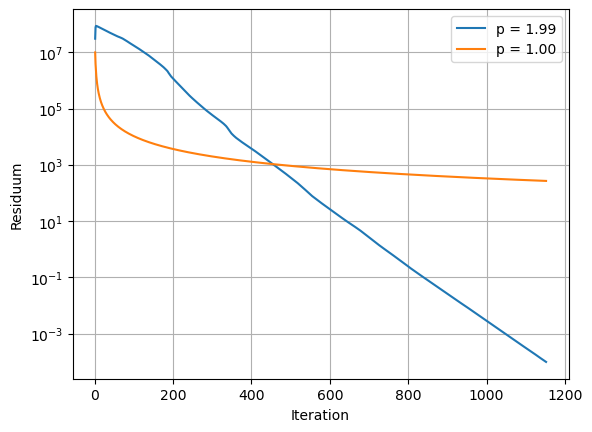

Max e =  7.654219297307223
Max e =  12.2741812133541
Iterations for p = 1.99:  1152


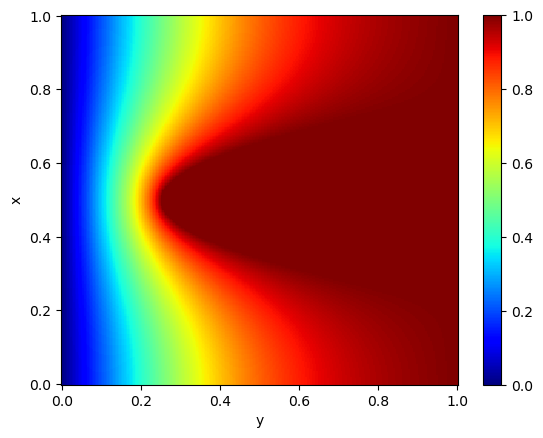

Maximum e field is:  7.654219297307223


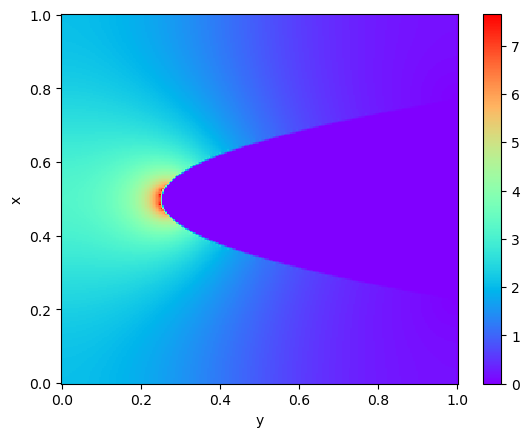

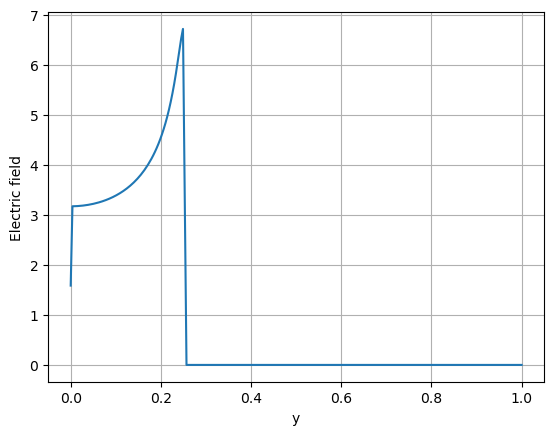

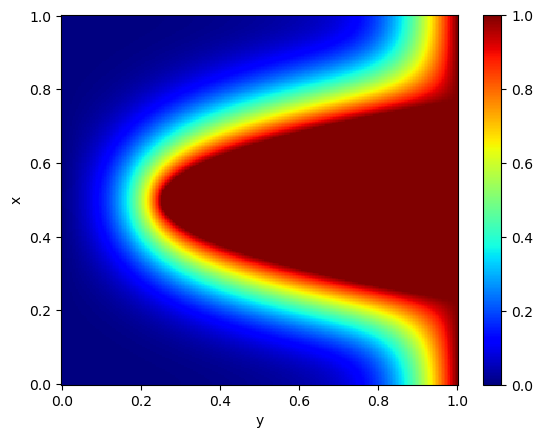

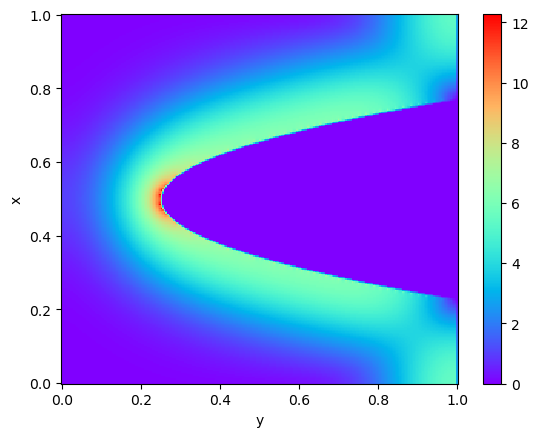

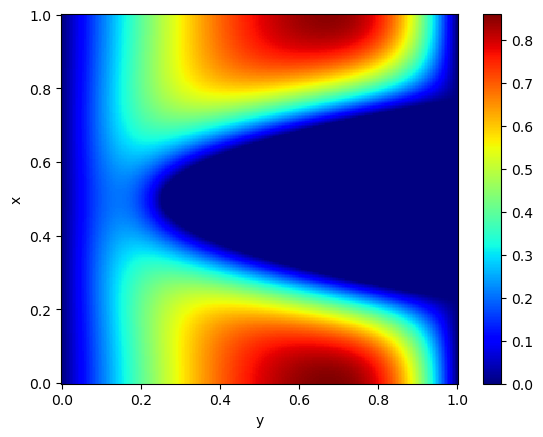

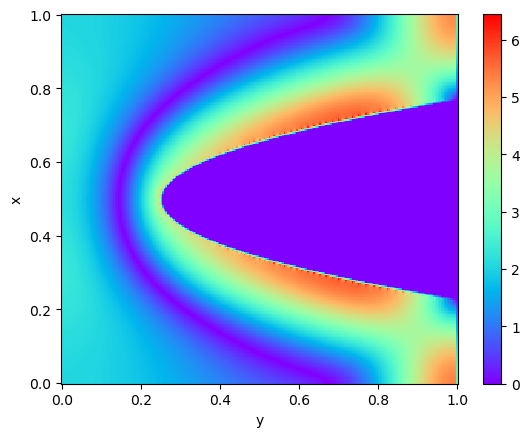

[1.58508288 3.17047469 3.17134576 3.17278779 3.17481283 3.17742129
 3.18064092 3.18444964 3.18886923 3.19389926 3.19953951 3.2058506
 3.21280198 3.22039824 3.22869896 3.23770161 3.2474146  3.25787274
 3.26910948 3.28114356 3.29398491 3.30767623 3.32227483 3.33779618
 3.35425244 3.37174981 3.39032856 3.40997773 3.43079384 3.45284058
 3.4762002  3.5009403  3.52712441 3.55484806 3.58420118 3.61531887
 3.64830185 3.68328208 3.72041604 3.75985863 3.80179678 3.84639454
 3.89391758 3.94464642 3.99881544 4.05674936 4.11883785 4.18548767
 4.25718495 4.33447816 4.41799858 4.50848802 4.60678864 4.7138962
 4.83096793 4.95936972 5.10066937 5.25658334 5.42903367 5.61982839
 5.8300413  6.05848326 6.29838105 6.53077218 6.71492601 3.39405959
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_tip = 0.5
y_tip = 0.25
R = 0.05
N = 257

def y(x):
    a = (x - x_tip)**2 / (2 * R) + y_tip
    if a<1:
        return a
    else:
        return 1

def residuum(Phi):
    h = 1/N
    Res = 0
    for i in range(0, N):
        tip = y(h*i)
        for j in range(1,np.ceil(tip/h).astype(int)-1):
            if(i==0):
                Int = (1/(h**2) * (Phi[i][j] + Phi[i][j-1] - 4 * Phi[i][j] + Phi[i+1][j] + Phi[i][j+1]))**2
            else:
                if(i==N):
                    Int = (1/(h**2) * (Phi[i-1][j] + Phi[i][j-1] - 4 * Phi[i][j] + Phi[i][j] + Phi[i][j+1]))**2
                else:
                    Int = (1/(h**2) * (Phi[i-1][j] + Phi[i][j-1] - 4 * Phi[i][j] + Phi[i+1][j] + Phi[i][j+1]))**2
            Res = Res + h*h*Int
    print(Res)
    return Res


def Gauss_Seidel():
    h = 1/N
    residuumplot = []
    residuumplot_100 = []
    counterplot = []
    xplot = np.zeros(N+1)
    Phi = np.zeros((N+1, N+1))
    Phi_100 = np.zeros((N+1, N+1))
    for i in range(0, N+1):
        tip = y(h*i)
        for j in range(np.ceil(tip/h).astype(int), N+1):
            Phi[i][j] = 1
            Phi_100[i][j] = 1
    counter = 0 
    while True:
        for i in range(0, N+1):
            tip = y(h*i)
            xplot[i] = i*h
            for j in range(1,np.ceil(tip/h).astype(int)):
                Phi_n = Phi[i][j]
                if(i == 0):
                    Phi_GS = 0.25*(Phi[i][j] + Phi[i][j-1] + Phi[i+1][j] + Phi[i][j+1])
                    Phi_GS_100 = 0.25*(Phi_100[i][j] + Phi_100[i][j-1] + Phi_100[i+1][j] + Phi_100[i][j+1])
                else:
                    if(i == N):
                        Phi_GS = 0.25*(Phi[i-1][j] + Phi[i][j-1] + Phi[i][j] + Phi[i][j+1])
                        Phi_GS_100 = 0.25*(Phi_100[i-1][j] + Phi_100[i][j-1] + Phi_100[i][j] + Phi_100[i][j+1])
                    else:
                        Phi_GS = 0.25*(Phi[i-1][j] + Phi[i][j-1] + Phi[i+1][j] + Phi[i][j+1])
                        Phi_GS_100 = 0.25*(Phi_100[i-1][j] + Phi_100[i][j-1] + Phi_100[i+1][j] + Phi_100[i][j+1])
                Phi_100[i][j] = Phi_GS_100
                Phi[i][j] = 1.99 * Phi_GS + (1 - 1.99) * Phi_n
        counter = counter + 1
        residuum_now=residuum(Phi)
        residuum_now_100=residuum(Phi_100)
        residuumplot_100.append(residuum_now_100)
        residuumplot.append(residuum_now)
        counterplot.append(counter)
        if residuum_now<0.0001:
            break
    plt.plot(counterplot, residuumplot, label ='p = 1.99')
    plt.plot(counterplot, residuumplot_100, label = 'p = 1.00')
    plt.grid()
    plt.legend()
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Residuum')
    plt.savefig('Residuum', dpi = 300)
    plt.show()
    
    return counter, Phi, xplot, Phi_100

def EField(Phi):
    E = np.zeros((N+1, N+1))
    h = 1/N
    emax = 0
    for i in range(0, N+1):
        for j in range(0, N+1):
            if j == 0:    
                yder = 0.5*1/h*(Phi[i][j+1] -Phi[i][j])
            else:
                if j == N:
                    yder = 0.5*1/h*(Phi[i][j] - Phi[i][j-1])
                else:
                    yder = 0.5*1/h*(Phi[i][j+1] - Phi[i][j-1])
            if i == 0 or i == N:
                xder = 0
            else:
                xder = 0.5*1/h*(Phi[i+1][j]-Phi[i-1][j])
            E[i][j] = np.sqrt(np.abs(xder**2+yder**2))
            if E[i][j] > emax:
                emax = E[i][j]
    print('Max e = ', emax)
    return E, emax


N_199, Phi_199, xplot, Phi_100 = Gauss_Seidel()
E, emax = EField(Phi_199)
E_100, emax_100 = EField(Phi_100)
print("Iterations for p = 1.99: ", N_199)
plt.pcolor(xplot, xplot, Phi_199, cmap = plt.cm.jet, vmin = 0, vmax = 1)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.savefig('potential', dpi = 300)
plt.show()
print('Maximum e field is: ', emax)
plt.pcolor(xplot, xplot, E, cmap = plt.cm.rainbow)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.savefig('E_map', dpi = 300)
plt.show()
plt.plot(xplot, E[128])
plt.grid()
plt.xlabel('y')
plt.ylabel('Electric field')
plt.savefig('E_plot', dpi = 300)
plt.show()
plt.pcolor(xplot, xplot, Phi_100, cmap = plt.cm.jet)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.savefig('potential_100', dpi = 300)
plt.show()
plt.pcolor(xplot, xplot, E_100, cmap = plt.cm.rainbow)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.savefig('E_map_100', dpi = 300)
plt.show()
plt.pcolor(xplot, xplot, np.abs(Phi_199-Phi_100), cmap = plt.cm.jet)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.savefig('potential_diff', dpi = 300)
plt.show()
plt.pcolor(xplot, xplot, np.abs(E - E_100), cmap = plt.cm.rainbow)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.savefig('E_map_diff', dpi = 300)
plt.show()
print(E[128])